# a) Densidad de energía por unidad de frecuencia, en función de la longitud de onda. Distribución de Planck.

### La distribución de Planck en función de la longitud de onda está dada por:

$$u(\lambda, T) = \frac{8\pi h}{\lambda^3}\frac{1}{\exp\left(\frac{hc}{\lambda kT}\right)-1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#constantes fundamentales en unidades SI
h = 6.626e-34
c = 3e8
k = 1.38e-23

In [3]:
def energy_density_planck(_lambda, T):
    f1 = (8*np.pi*h*10**15)/((_lambda)**3) #El factor 10^15 se usa para que las unidades sean microJ/m^3/GHz.
    f2 = np.exp((h*c)/(_lambda*k*T))
    f3 = f1*1/(f2-1) #Distribución de Planck en función de la longitud de onda.
    return f3

In [4]:
_lambda = np.linspace(1e-9, 2500e-9, 10000)

In [5]:
densidad10000 = energy_density_planck(_lambda, 10000)
densidad8000 = energy_density_planck(_lambda, 8000)
densidad5000 = energy_density_planck(_lambda, 5000)
densidad3000 = energy_density_planck(_lambda, 3000)

Text(0, 0.5, 'Densidad de energía/ frecuencia $u_{\\lambda}(T)$ ($\\mu J/m^3/Ghz$)')

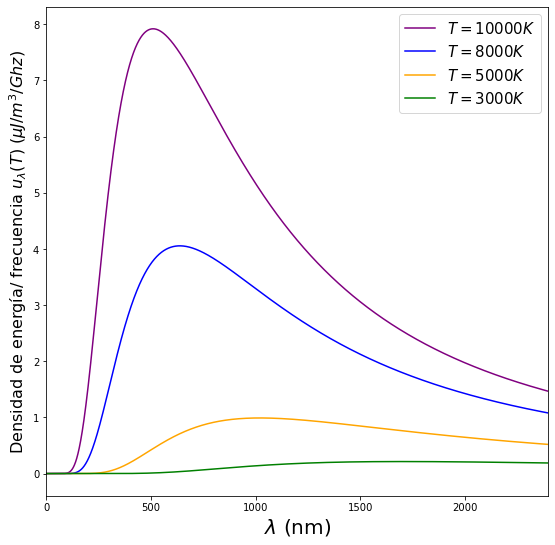

In [6]:
plt.figure(figsize=(9, 9))
plt.plot(_lambda*10**9, densidad10000, label = '$T = 10000K$', color = 'purple')
plt.plot(_lambda*10**9, densidad8000, label = '$T = 8000K$', color = 'blue')
plt.plot(_lambda*10**9, densidad5000, label = '$T = 5000K$', color = 'orange')
plt.plot(_lambda*10**9, densidad3000, label = '$T = 3000K$', color = 'green')
plt.legend(fontsize=15)
plt.xlim(0, 2400)
plt.xlabel("$\lambda$ (nm)", size=20)
plt.ylabel("Densidad de energía/ frecuencia $u_{\lambda}(T)$ ($\mu J/m^3/Ghz$)", size=16)

# b) Cálculo de los picos para cada una de las funciones en a)

## Para T = 10000K

In [7]:
_lambda[np.argmax(densidad10000)]*10**9 
#Se encuentra la posición x del máximo y se busca ese índice en el array de lambda. Se convierte a nanómetros.

510.5970597059706

El máximo de esta función está en $\lambda = 510.60$ nm. Se encuentra en el espectro de **luz visible**.

## Para T = 8000K

In [8]:
_lambda[np.argmax(densidad8000)]*10**9 

638.058805880588

El máximo de esta función está en $\lambda = 638.06$ nm. Se encuentra en el espectro de **luz visible**.

## Para T = 5000K

In [9]:
_lambda[np.argmax(densidad5000)]*10**9 

1020.9438943894389

El máximo de esta función está en $\lambda = 1020.94$ nm. Se encuentra en el espectro de **luz infrarrojo**.

## Para T = 3000K

In [10]:
_lambda[np.argmax(densidad3000)]*10**9 

1701.7395739573956

El máximo de esta función está en $\lambda = 1701.74$ nm. Se encuentra en el espectro de **luz infrarrojo**.

# c) Distribución de Rayleigh-Jeans y Wien. Comparación con Planck.

### Primero se calcula la distribución de Planck en función de la frecuencia: 

$$u_P(\nu, T) = \frac{8\pi\nu^2}{c^3}\frac{h\nu}{\exp\left(\frac{h\nu}{kT}\right)-1}$$

In [11]:
def energy_density_planck(frec, T):
    f1 = (8*np.pi*h*frec**3*1e15)/(c**3) #El factor 10^15 se usa para que las unidades sean microJ/m^3/GHz.
    f2 = np.exp((h*frec)/(k*T))
    f3 = f1/(f2-1) #Distribución de Planck en función de la frecuencia.
    return f3

### Se calcula ahora la curva en base a la distribución de Raileigh-Jeans:

$$ u_{RJ}(\nu, T) = \frac{8\pi\nu^2}{c^3}kT$$

### y en base a la distribución de Wien:

$$u_W(\nu, T) = \frac{8\pi h\nu^3}{c^3}\exp\left(-\frac{h\nu}{kT}\right)$$

In [12]:
def energy_density_RJ(frec, T):
    return (8*np.pi*frec**2*k*T*10**15)/(c**3) #Distribución de Raileigh-Jeans en función de la frecuencia.

def energy_density_wien(frec, T):
    f1 = (8*np.pi*h*frec**3*10**15)/(c**3)
    f2 = np.exp(-(h*frec)/(k*T)) #Distribución de Wien en función de la frecuencia.
    return f1*f2

## Graficando

In [13]:
frec = np.linspace(0, 1200e12, 20000)

In [14]:
densidadPlanck = energy_density_planck(frec, 8000)
densidadRJ = energy_density_RJ(frec, 8000)
densidadWien = energy_density_wien(frec, 8000)
densidadRJ, densidadWien

(array([0.00000000e+00, 3.69990949e-07, 1.47996380e-06, ...,
        1.47951984e+02, 1.47966782e+02, 1.47981580e+02]),
 array([0.00000000e+00, 1.33195644e-10, 1.06518149e-09, ...,
        7.94308807e-01, 7.94141934e-01, 7.93975090e-01]))

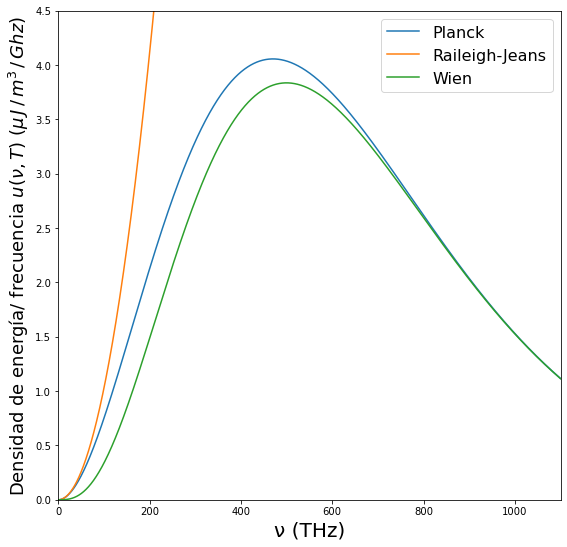

In [15]:
plt.figure(figsize=(9,9))
plt.plot(frec*1e-12, densidadPlanck, label = 'Planck')
plt.plot(frec*1e-12, densidadRJ, label = 'Raileigh-Jeans')
plt.plot(frec*1e-12, densidadWien, label = 'Wien')
plt.xlabel("ν (THz)", size = 20)
plt.ylabel(r"Densidad de energía/ frecuencia $u(\nu, T)$ ($\mu \, J\, / \, m^3\, /\, Ghz$)", size = 18)
plt.ylim(0, 4.5)
plt.xlim(0, 1100)
plt.legend(fontsize=16)

## Para bajas frecuencias

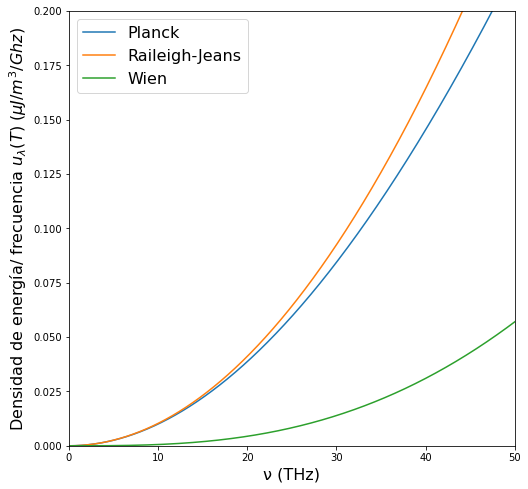

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(frec*1e-12, densidadPlanck, label = 'Planck')
plt.plot(frec*1e-12, densidadRJ, label = 'Raileigh-Jeans')
plt.plot(frec*1e-12, densidadWien, label = 'Wien')
plt.xlabel("ν (THz)", size = 16)
plt.ylabel("Densidad de energía/ frecuencia $u_{\lambda}(T)$ ($\mu J/m^3/Ghz$)", size=16)
plt.ylim(0, 0.2)
plt.xlim(0, 50)
plt.legend(fontsize=16)

## Comparación de gráficas

### Se puede hacer una comparación punto a punto de las gráficas si tomamos el cociente entre la distribución de Planck en función de la frecuencia y la distribución de Raileigh-Jeans o la distribución de Wien. Entre más se acerque el cociente a 1, más "parecidas" serán las gráficas en ese punto.

(0.8, 1.1)

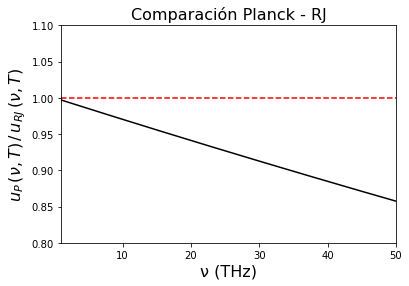

In [17]:
comparacionPlanck_RJ = energy_density_planck(frec, 8000)/energy_density_RJ(frec, 8000)
plt.plot(frec*1e-12, comparacionPlanck_RJ, color = 'k')
plt.axhline(1, linestyle = 'dashed', color = 'r')
plt.xlabel("ν (THz)", size = 16)
plt.title("Comparación Planck - RJ", size = 16)
plt.ylabel(r"$u_P\,(\nu, T)\, / \,u_{RJ}\,(\nu, T)$", size = 16)
plt.xlim(1, 50)
plt.ylim(0.8, 1.1)

### En este caso, se observa que para bajas frecuencias, el cociente entre las distribuciones de Planck y Raileigh-Jeans se acerca a 1. Claramente, para frecuencias más grandes, el cociente tenderá a 0, pues la distribución RJ crecerá en función de $\nu^2$. Para frecuencias aún más pequeñas se tiene lo siguiente:

(0.95, 1.05)

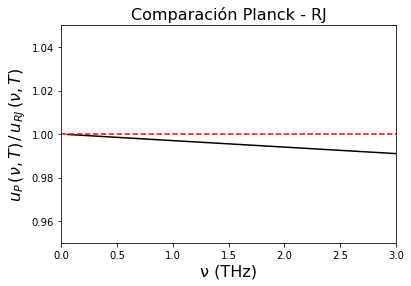

In [18]:
plt.plot(frec*1e-12, comparacionPlanck_RJ, color = 'k')
plt.axhline(1, linestyle = 'dashed', color = 'r')
plt.xlabel("ν (THz)", size = 16)
plt.title("Comparación Planck - RJ", size = 16)
plt.ylabel(r"$u_P\,(\nu, T)\, / \,u_{RJ}\,(\nu, T)$", size = 16)
plt.xlim(0, 3)
plt.ylim(0.95, 1.05)

### Entre más baja sea la frecuencia, mayor es la correspondencia entre las gráficas. Esto concuerda con lo esperado para la distribución de RJ, pues para bajas frecuencias se acerca al modelo de Planck.

(0.7, 1.3)

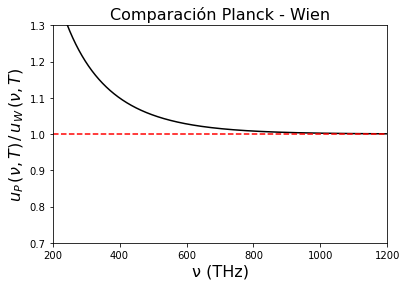

In [19]:
comparacionPlanck_Wien = energy_density_planck(frec, 8000)/energy_density_wien(frec, 8000)
plt.plot(frec*1e-12, comparacionPlanck_Wien, color = 'k')
plt.axhline(1, linestyle = 'dashed', color = 'r')
plt.title("Comparación Planck - Wien", size = 16)
plt.ylabel(r"$u_P\,(\nu, T)\, / \,u_{W}\,(\nu, T)$", size = 16)
plt.xlabel("ν (THz)", size = 16)
plt.xlim(200, 1200)
plt.ylim(0.7, 1.3)

### Para la comparación entre Planck y Wien, se observa que para altas frecuencias, el cociente entre las distribuciones se acerca a 1. Haciendo un acercamiento de esta gráfica para frecuencias altas:

(0.9, 1.1)

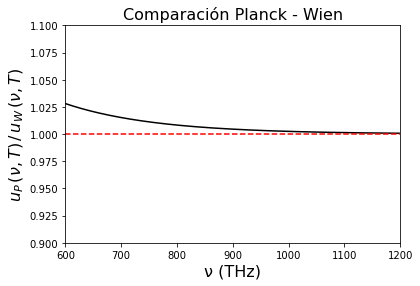

In [20]:
plt.plot(frec*1e-12, comparacionPlanck_Wien, color = 'k')
plt.axhline(1, linestyle = 'dashed', color = 'r')
plt.title("Comparación Planck - Wien", size = 16)
plt.ylabel(r"$u_P\,(\nu, T)\, / \,u_{W}\,(\nu, T)$", size = 16)
plt.xlabel("ν (THz)", size = 16)
plt.xlim(600, 1200)
plt.ylim(0.9, 1.1)

### La distribución de Wien se aproxima a la distribución de Planck para frecuencias altas.